단일 변수의 분포, 아마도 에 할당된 두 번째 변수에 대한 조건부인 일변량 분포를 고려했습니다 hue. 그러나 두 번째 변수를 에 할당하면 이변량y 분포 가 그려집니다 .

In [2]:
import seaborn as sns
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


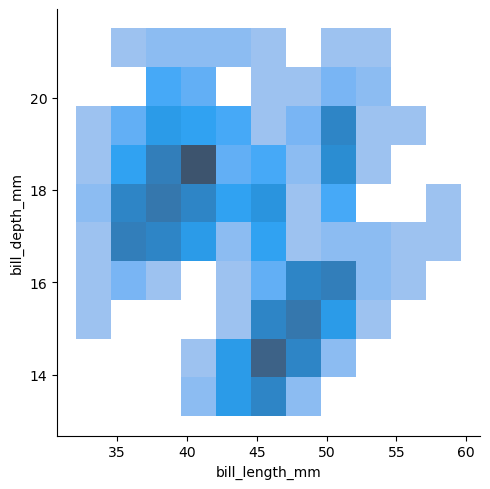

In [3]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm")

이변량 히스토그램은 플롯을 타일링하는 사각형 내의 데이터를 비닝한 다음 각 사각형 내의 관측치 수를 채우기 색상( a 와 유사 heatmap())으로 표시합니다
. 마찬가지로, 이변량 KDE 플롯은 2D 가우시안으로 (x, y) 관찰을 평활화합니다. 그런 다음 기본 표현은 2D 밀도의 윤곽을 보여줍니다.

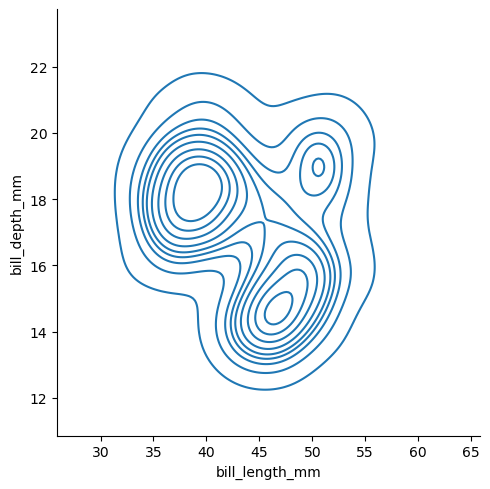

In [4]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde")

변수를 할당하면 hue여러 색상을 사용하여 여러 히트맵 또는 등고선 세트를 구성합니다. 이변량 히스토그램의 경우 조건부 분포 사이에 최소한의 중첩이 있는 경우에만 잘 작동합니다.

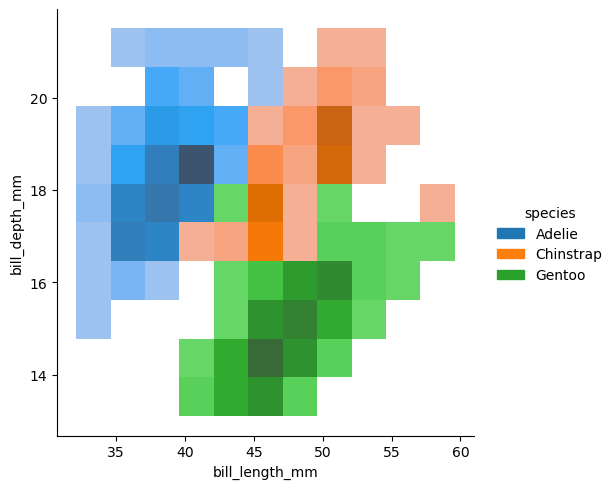

In [5]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

이변량 KDE 플롯의 등고선 접근법은 겹침을 평가하는 데 더 적합하지만 윤곽선이 너무 많은 플롯은 복잡해질 수 있습니다.



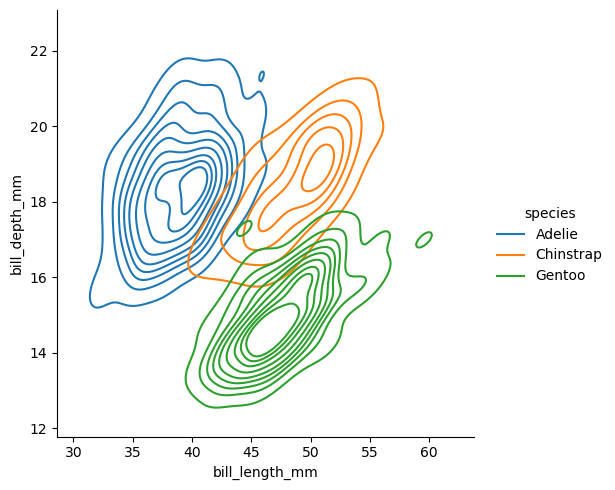

In [6]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

일변량 플롯과 마찬가지로 빈 크기 또는 평활화 대역폭의 선택에 따라 플롯이 기본 이변량 분포를 얼마나 잘 나타내는지가 결정됩니다. 동일한 매개변수가 적용되지만 값 쌍을 전달하여 각 변수에 대해 조정할 수 있습니다.

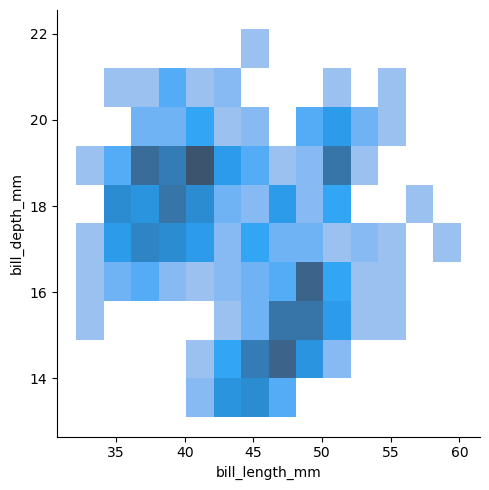

In [11]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .9))

히트맵의 해석을 돕기 위해 색상 막대를 추가하여 개수와 색상 강도 간의 매핑을 표시합니다.

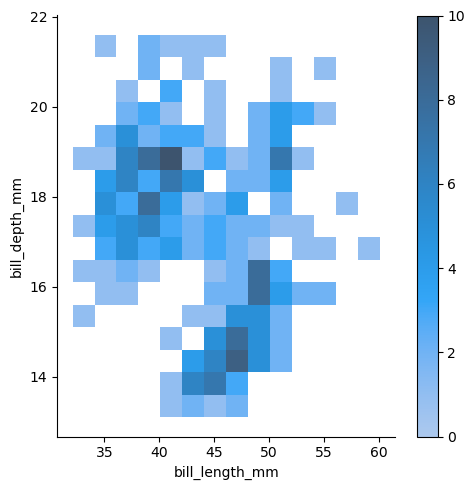

In [12]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5), cbar=True)

이변량 밀도 등고선의 의미는 덜 간단합니다. 밀도를 직접 해석할 수 없기 때문에 등고선은 밀도의 등비 로 그려집니다. 즉, 각 곡선은 밀도의 일부 비율 p 가 그 아래에 놓이도록 설정된 수준을 나타냅니다 . p 값은 균일한 간격을 가지며 가장 낮은 수준은 매개변수로 제어되고 숫자thresh 는 다음으로 제어됩니다 levels.

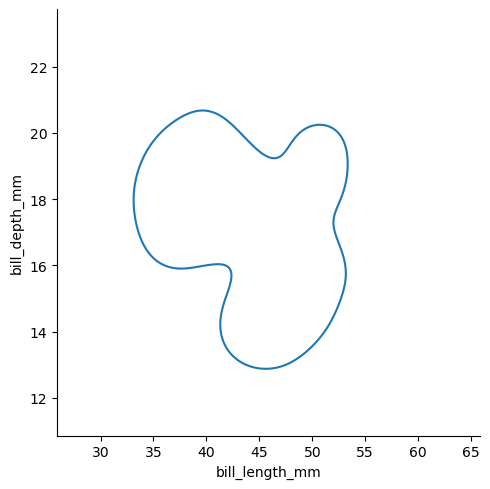

In [16]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", thresh=.2, levels=1)

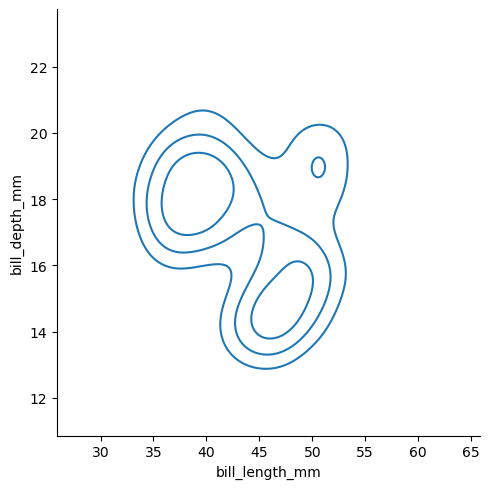

In [19]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", thresh=.2, levels=4)

이 levels매개변수는 더 많은 제어를 위해 값 목록도 허용합니다.

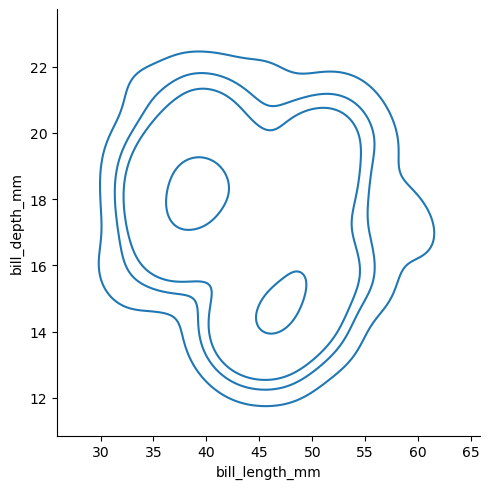

In [20]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", levels=[.01, .05, .1, .8])

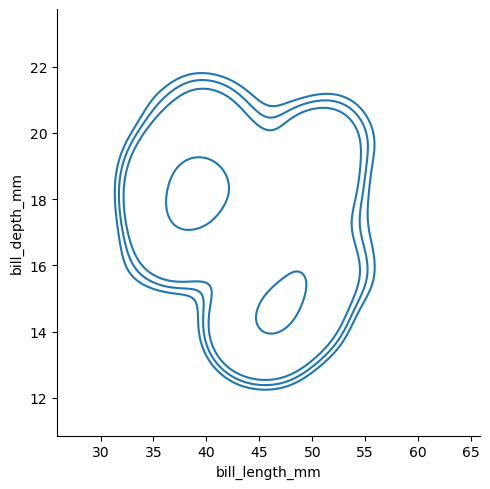

In [27]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", levels=[.05, .07, .1, .8]) #levels 값이 점점 커져야 함

이변량 히스토그램을 사용하면 하나 또는 두 변수가 이산형이 될 수 있습니다. 하나의 불연속 변수와 하나의 연속 변수를 플로팅하면 조건부 일변량 분포를 비교하는 또 다른 방법이 제공됩니다.

In [30]:
diamonds = sns.load_dataset("diamonds")
diamonds 

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


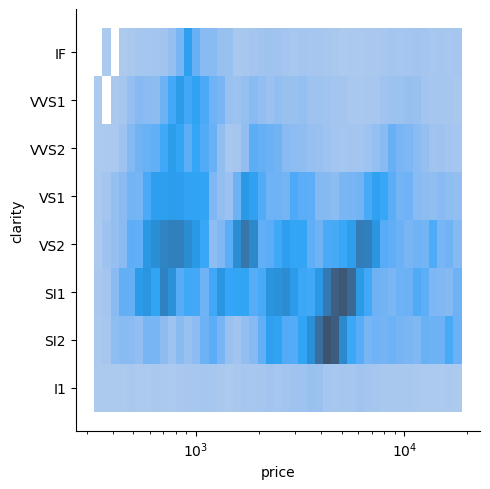

In [29]:
sns.displot(diamonds, x="price", y="clarity", log_scale=(True, False))

대조적으로, 두 개의 이산 변수를 플로팅하면 관측치의 교차 표를 쉽게 표시할 수 있습니다.

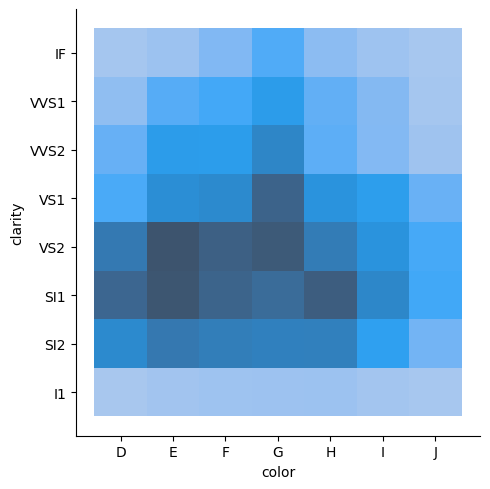

In [34]:
sns.displot(diamonds, x="color", y="clarity")